In [2]:
require(ggplot2)
#require(cluster)

In [4]:
DATA_PATH='/ifs/scratch/oursu/paper_2017-12-20'
SIMULATIONS_PATH=paste(DATA_PATH,'/simulations',sep='')
RESOLUTION=50
MULTI=1
MULTI_BOUNDARY=1
MULTI_DD=0.001

In [54]:
plot_noise=function(f,out,yname,xname,noisename,multi,mini,maxi,xmax,resolution_in_kb,myxbreaks,WIDTH=9,HEIGHT=6){
    #======= settings for nice-looking ggplots
    niceggplot=theme(panel.border = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))+theme(axis.text=element_text(size=20),axis.title=element_text(size=20))+theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))

    niceggplot_fullborders=theme(axis.text=element_text(size=20),
                             axis.title=element_text(size=20))
    #==========================================
    
    #read in the scores
    scores=read.table(f)
    colnames(scores)=c('Depth1','Rep1','EN1','NN1','BN1','ab1','dd1','Depth2','Rep2','EN2','NN2','BN2','ab2','dd2','score')
    scores$BN1=scores$BN1*resolution_in_kb/1000
    scores$BN2=scores$BN2*resolution_in_kb/1000
    write.table(scores,file=gsub('.pdf','.txt',out),col.names=TRUE,row.names=FALSE,quote=FALSE,sep='\t')
    
    #record means and +-1 standard deviation
    #for each depth and noise level
    depths=unique(scores[,'Depth1'])
    noises=unique(scores[,noisename])
    datastats=data.frame(depth=rep(depths,times=length(noises)),
            noise=rep(noises,each=length(depths)),
            score_mean=0.0,score_l=0.0,score_h=0.0)
    for (i in c(1:(dim(datastats)[1]))){
        depth=datastats[i,'depth']
        noise=datastats[i,'noise']
        vals=as.numeric(as.character(scores[intersect(which(as.character(scores[,'Depth1'])==as.character(depth)),
                  which(as.character(scores[,noisename])==as.character(noise))),'score']))
        m=mean(vals)
        s=sd(vals)
        datastats[i,'score_mean']=m
        datastats[i,'score_l']=m-s
        datastats[i,'score_h']=m+s
    }

    #plot
    p=ggplot(datastats,aes(x=noise,y=score_mean,color=factor(depth)))+
      geom_point()+geom_line()+
      geom_errorbar(aes(ymin=score_l,ymax=score_h),width=0.05*multi)+
      theme_bw()+
      ylab(yname)+xlab(xname)+
      scale_colour_manual(values=c("10000"="#E69F00","100000"="#56B4E9","1000000"="#009E73","10000000"="#000000"))+
      scale_y_continuous(breaks = seq(from=-1,to=1,by=0.5), limits = c(mini,maxi))+
      scale_x_continuous(breaks = myxbreaks, limits = c(0,xmax))+niceggplot
   print(p)
    
   pdf(out,width=WIDTH,height=HEIGHT)
    print(p+
      theme(axis.title.y = element_text(size = rel(3), angle = 90))+
      theme(axis.title.x = element_text(size = rel(3), angle = 0))+
      theme(axis.text.x = element_text(size = rel(3), angle = 0))+
      theme(axis.text.y = element_text(size = rel(3), angle = 0)))
    dev.off()

}

Edge noise
===

png 
  2

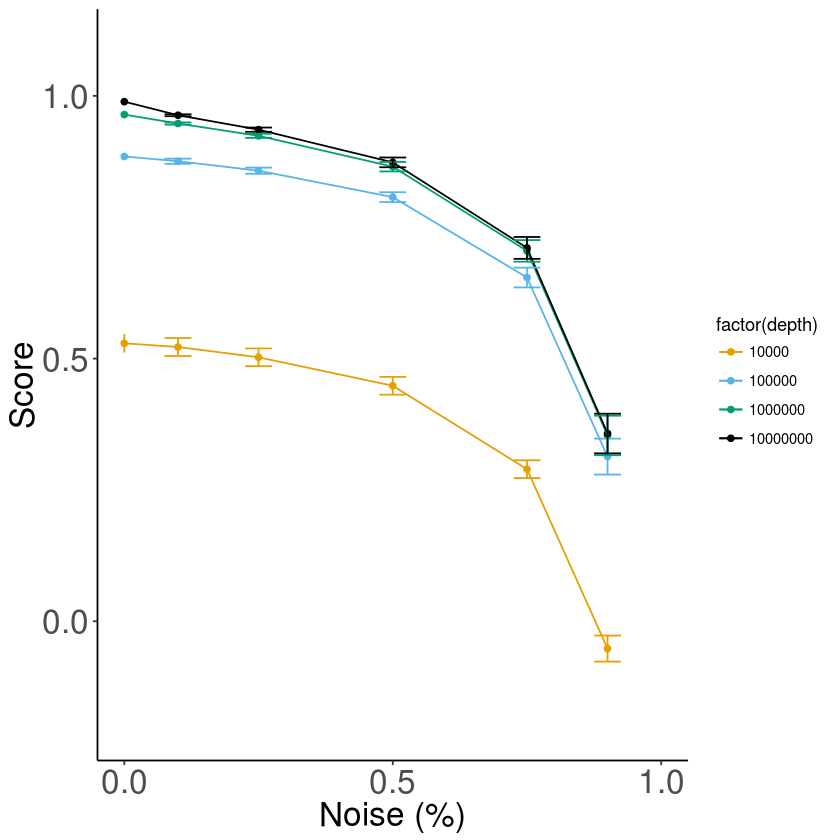

png 
  2

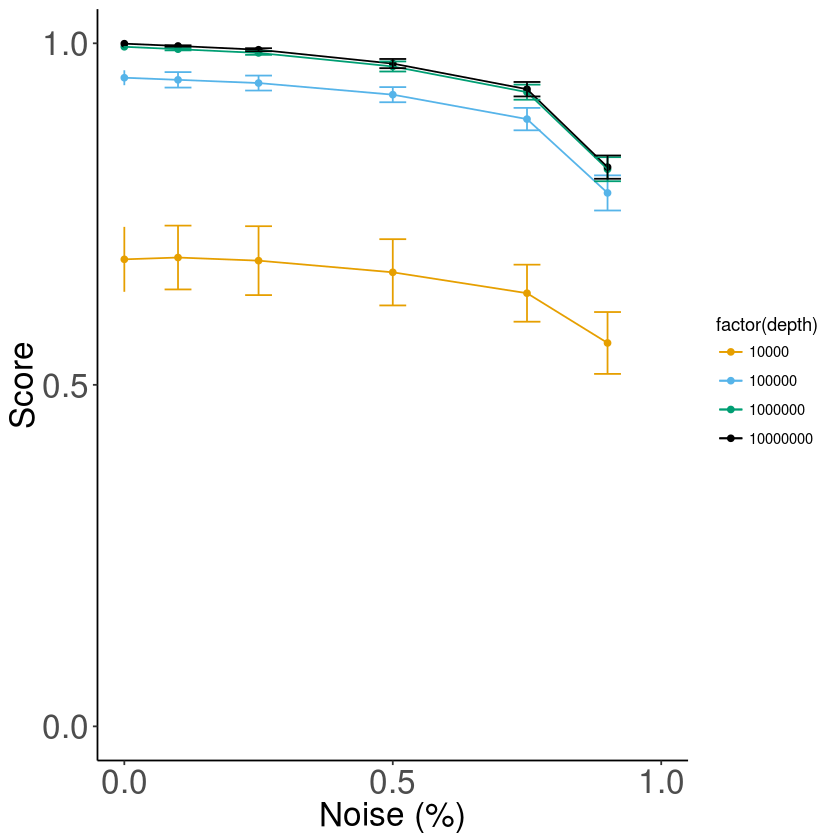

png 
  2

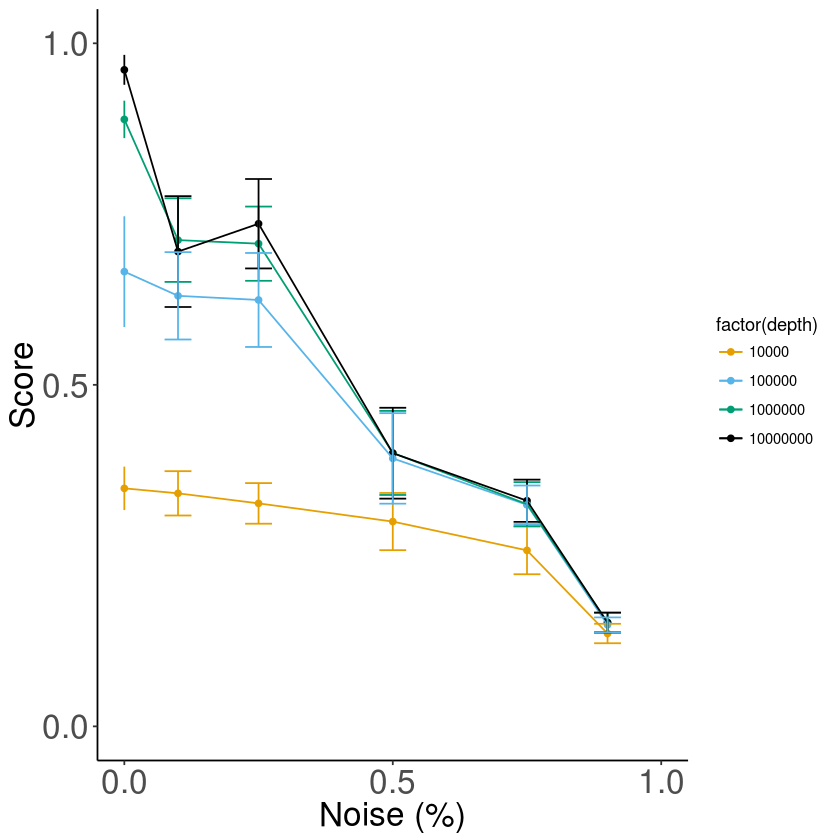

In [55]:
XBREAKS=c(0,0.5,1)
plot_noise(paste(SIMULATIONS_PATH,'/EdgeNoise/GenomeDISCO.results.txt',sep=''),
           paste(SIMULATIONS_PATH,'/EdgeNoise/GenomeDISCO.edgenoise.results.pdf',sep=''),'Score','Noise (%)','EN2',MULTI,-0.2,1.1,1,RESOLUTION,XBREAKS)

plot_noise(paste(SIMULATIONS_PATH,'/EdgeNoise/HiCRep.results.txt',sep=''),
           paste(SIMULATIONS_PATH,'/EdgeNoise/HiCRep.edgenoise.results.pdf',sep=''),'Score','Noise (%)','EN2',MULTI,0,1,1,RESOLUTION,XBREAKS)

plot_noise(paste(SIMULATIONS_PATH,'/EdgeNoise/HiC-Spector.results.txt',sep=''),
           paste(SIMULATIONS_PATH,'/EdgeNoise/HiC-Spector.edgenoise.results.pdf',sep=''),'Score','Noise (%)','EN2',MULTI,0,1,1,RESOLUTION,XBREAKS)

Node Noise
===

png 
  2

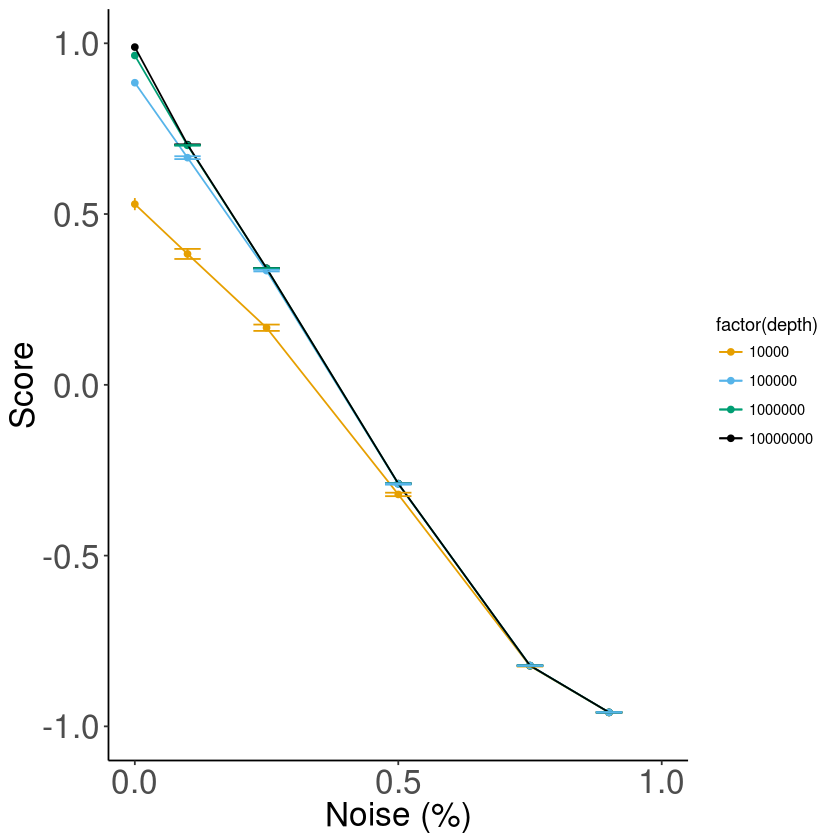

png 
  2

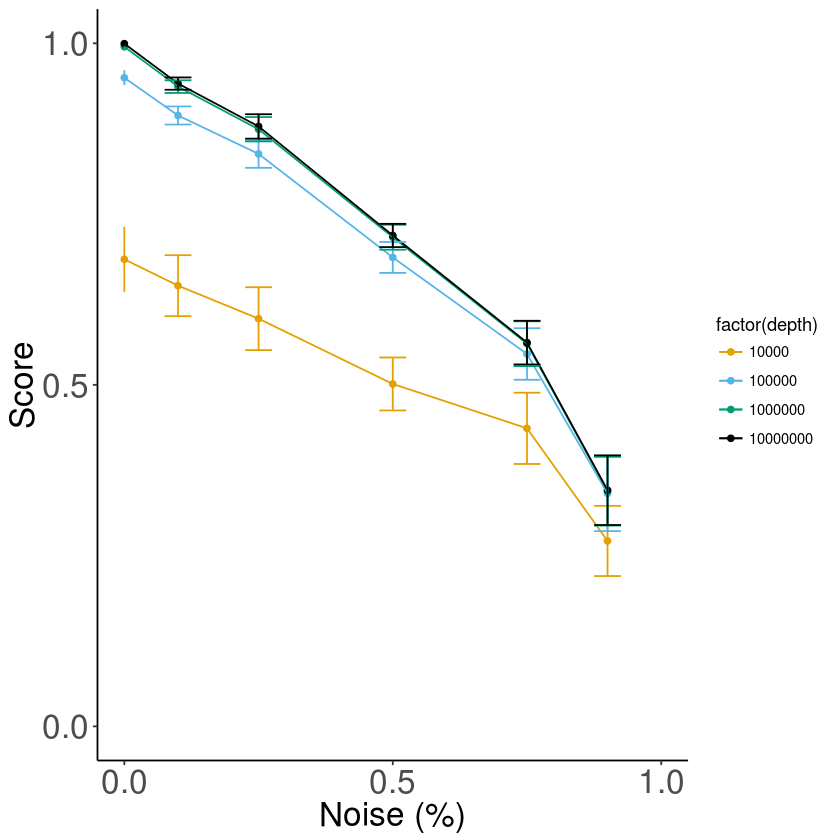

png 
  2

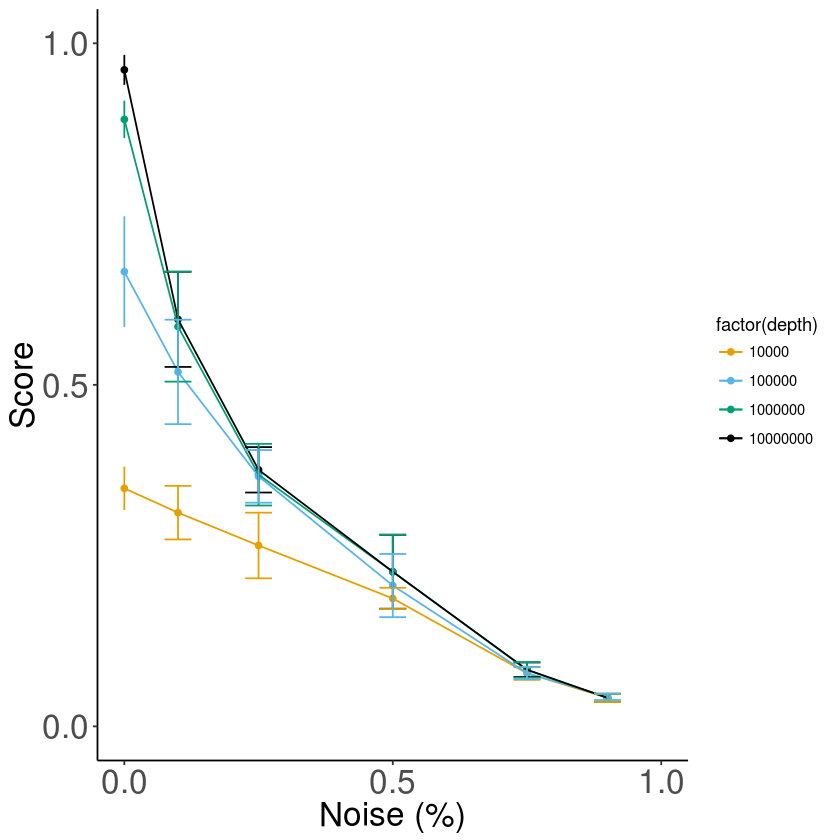

In [50]:
plot_noise(paste(SIMULATIONS_PATH,'/NodeNoise/GenomeDISCO.results.txt',sep=''),
           paste(SIMULATIONS_PATH,'/NodeNoise/GenomeDISCO.nodenoise.results.pdf',sep=''),'Score','Noise (%)','NN2',MULTI,-1,1,1,RESOLUTION,XBREAKS)

plot_noise(paste(SIMULATIONS_PATH,'/NodeNoise/HiCRep.results.txt',sep=''),
           paste(SIMULATIONS_PATH,'/NodeNoise/HiCRep.nodenoise.results.pdf',sep=''),'Score','Noise (%)','NN2',MULTI,0,1,1,RESOLUTION,XBREAKS)

plot_noise(paste(SIMULATIONS_PATH,'/NodeNoise/HiC-Spector.results.txt',sep=''),
          paste(SIMULATIONS_PATH,'/NodeNoise/HiC-Spector.nodenoise.results.pdf',sep=''),'Score','Noise (%)','NN2',MULTI,0,1,1,RESOLUTION,XBREAKS)

Misalignment
===

png 
  2

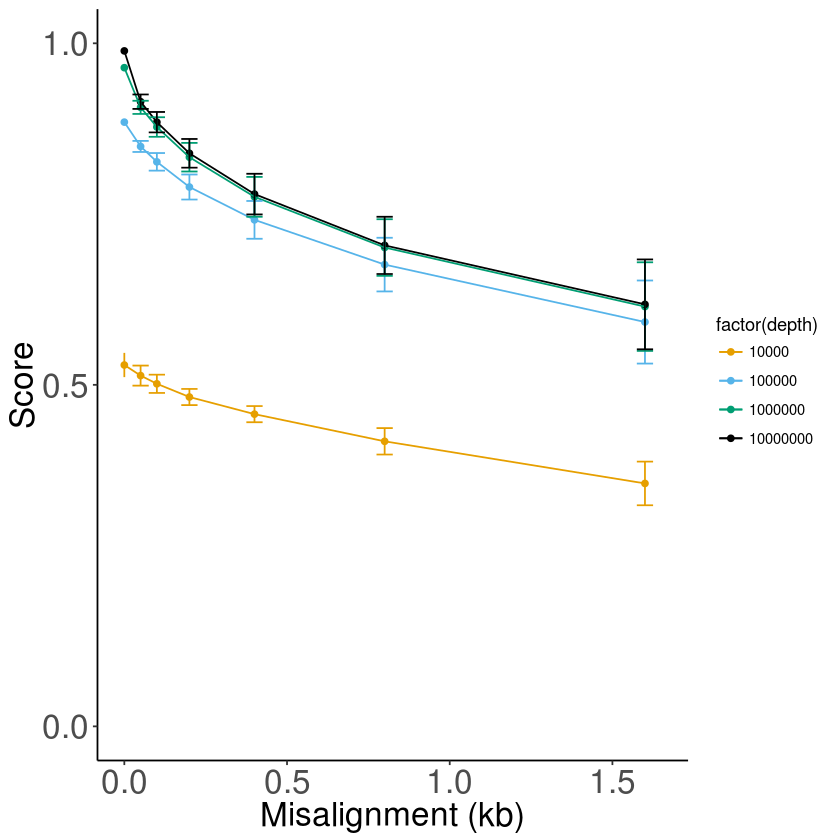

png 
  2

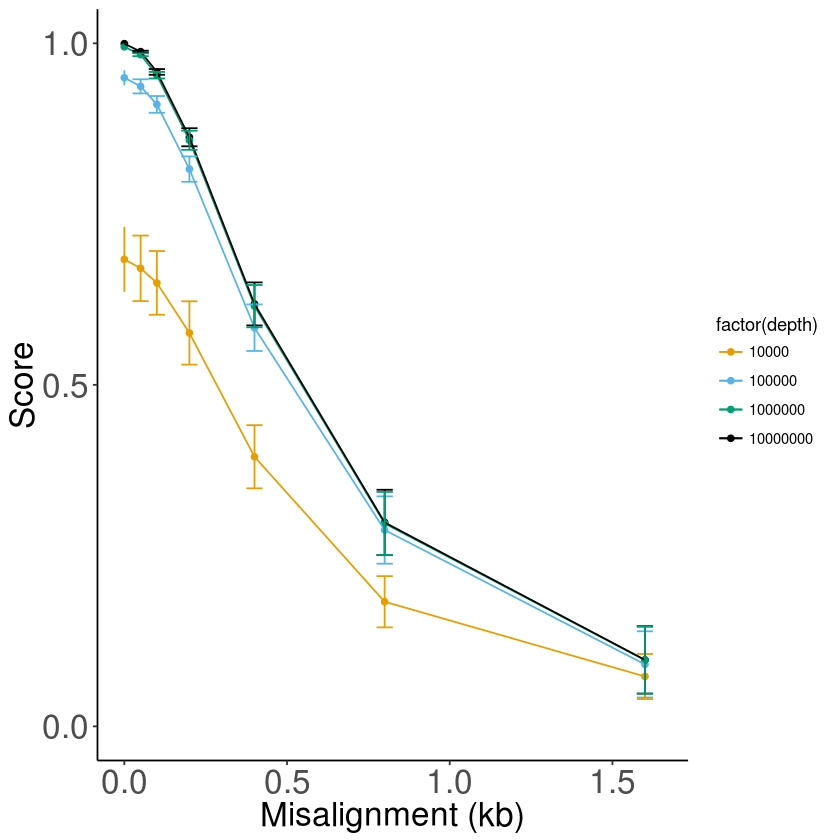

png 
  2

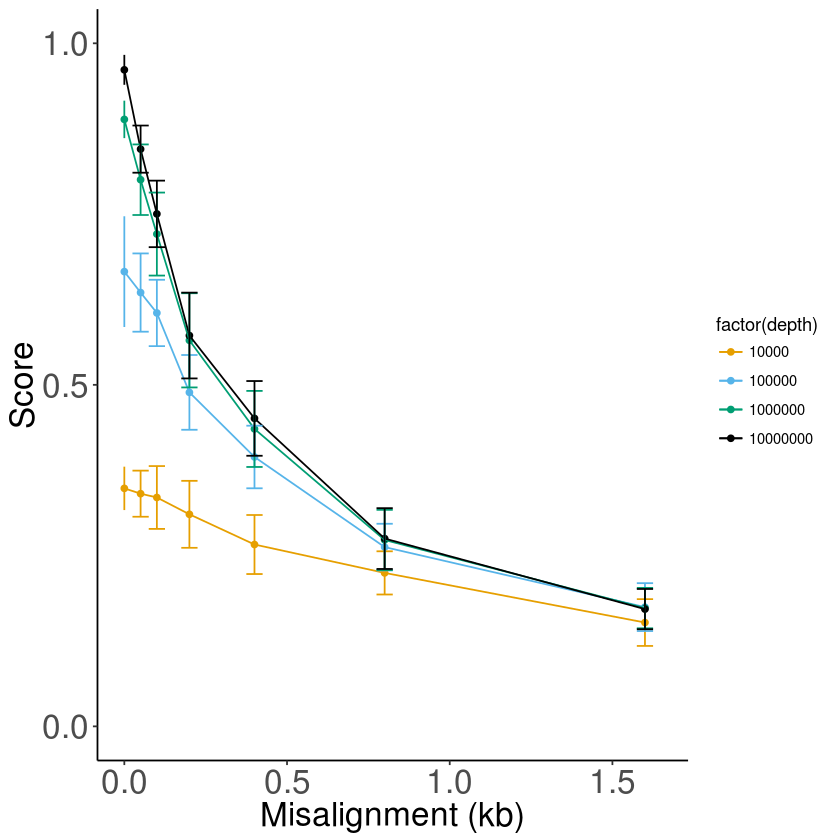

In [56]:
XBREAKS=c(0,0.5,1,1.5)
plot_noise(paste(SIMULATIONS_PATH,'/BoundaryNoise/GenomeDISCO.results.txt',sep=''),
           paste(SIMULATIONS_PATH,'/BoundaryNoise/GenomeDISCO.boundarynoise.results.pdf',sep=''),'Score','Misalignment (kb)','BN2',MULTI_BOUNDARY,0,1,1.650,RESOLUTION,XBREAKS)

plot_noise(paste(SIMULATIONS_PATH,'/BoundaryNoise/HiCRep.results.txt',sep=''),
           paste(SIMULATIONS_PATH,'/BoundaryNoise/HiCRep.boundarynoise.results.pdf',sep=''),'Score','Misalignment (kb)','BN2',MULTI_BOUNDARY,0,1,1.650,RESOLUTION,XBREAKS)

plot_noise(paste(SIMULATIONS_PATH,'/BoundaryNoise/HiC-Spector.results.txt',sep=''),
           paste(SIMULATIONS_PATH,'/BoundaryNoise/HiC-Spector.boundarynoise.results.pdf',sep=''),'Score','Misalignment (kb)','BN2',MULTI_BOUNDARY,0,1,1.650,RESOLUTION,XBREAKS)

Bioreps vs non-reps
===

[1] "/ifs/scratch/oursu/paper_2017-12-20/simulations/RepNonrep/GenomeDISCO.results.txt"
[1] "10000 1.72426983442645e-05"
[1] "100000 1.22985978980354e-05"
[1] "1000000 1.22740851870329e-05"
[1] "10000000 1.21851906633608e-05"


png 
  2

[1] "/ifs/scratch/oursu/paper_2017-12-20/simulations/RepNonrep/HiCRep.results.txt"
[1] "10000 1.27677651013995e-05"
[1] "10000000 1.22878074574887e-05"
[1] "1000000 1.23152890270603e-05"
[1] "100000 1.23379001451431e-05"


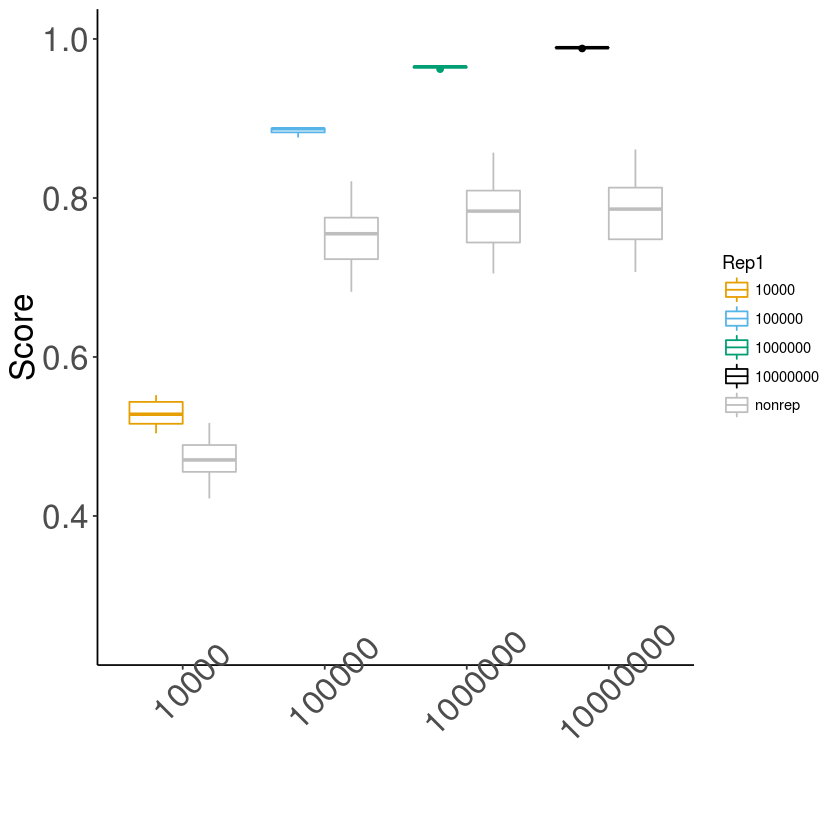

png 
  2

[1] "/ifs/scratch/oursu/paper_2017-12-20/simulations/RepNonrep/HiC-Spector.results.txt"
[1] "10000 1.41169180276102e-05"
[1] "100000 1.23270819690603e-05"
[1] "1000000 1.23300316236174e-05"
[1] "10000000 1.23231499793963e-05"


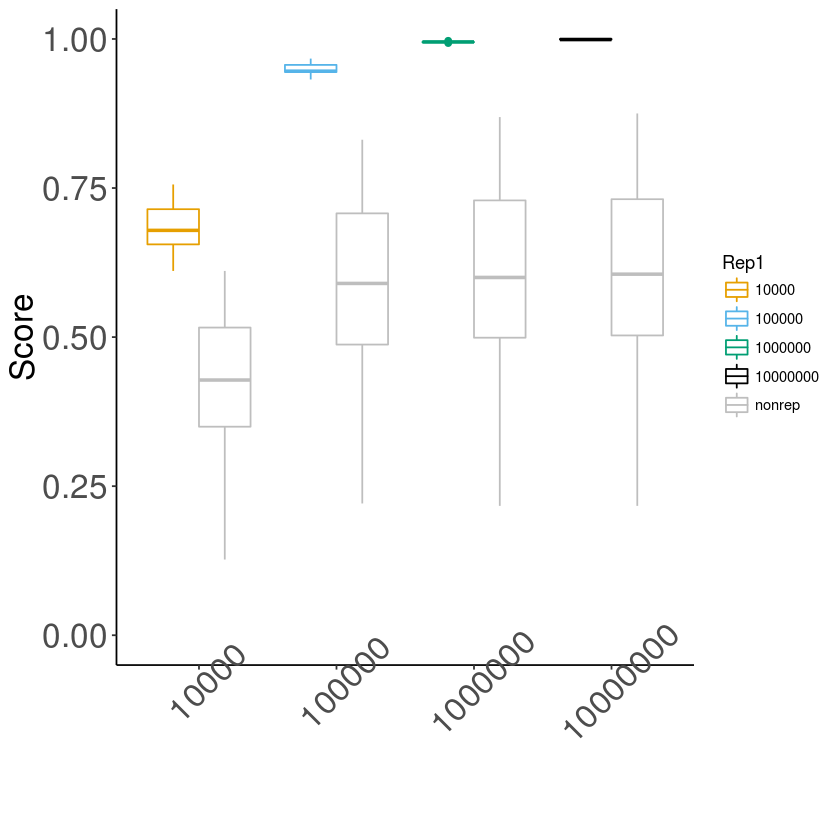

png 
  2

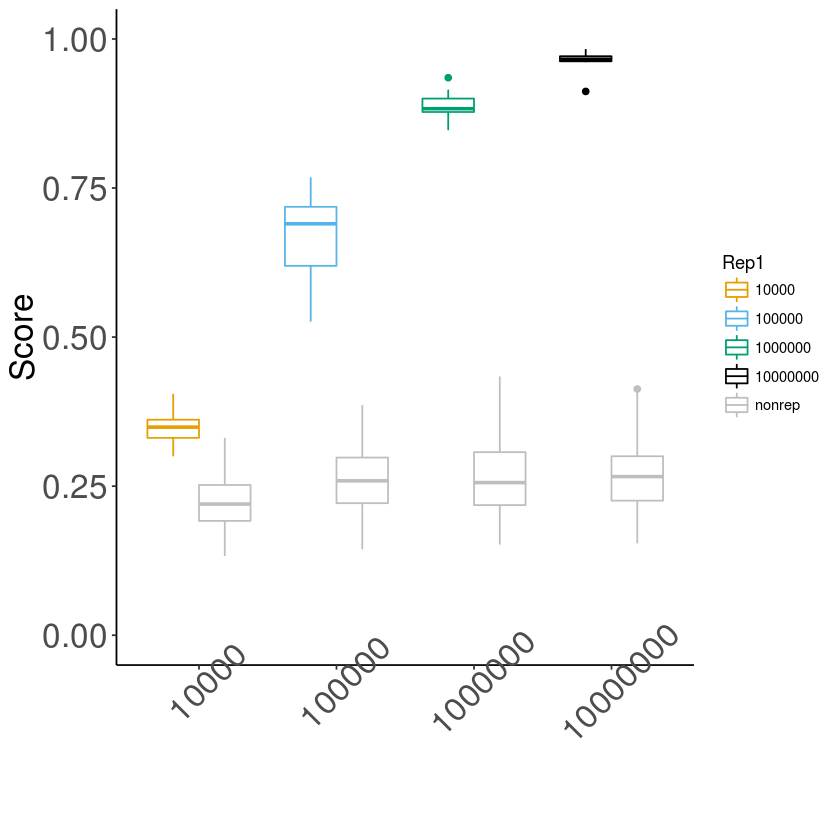

In [59]:
plot_biorep_nonrep=function(f,out,yname,xname,noisename,multi=1,mini,maxi,WIDTH=9,HEIGHT=6){

    #======= settings for nice-looking ggplots
    niceggplot=theme(panel.border = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))+theme(axis.text=element_text(size=20),axis.title=element_text(size=20))+theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))

    niceggplot_fullborders=theme(axis.text=element_text(size=20),
                             axis.title=element_text(size=20))
    #==========================================
 
    
    #read in data
    scores=read.table(f)
    colnames(scores)=c('Depth1','Rep1','EN1','NN1','BN1','ab1','dd1','Depth2','Rep2','EN2','NN2','BN2','ab2','dd2','score')
    write.table(scores,file=gsub('.pdf','.txt',out),col.names=TRUE,row.names=FALSE,quote=FALSE,sep='\t')

    
    #keep only those with no edge noise
    en_0=which(scores$EN2==0.0)
    scores=scores[en_0,]
    
    #annotate replicates
    reps=which(as.character(scores[,"Rep1"])==as.character(scores[,"Rep2"]))
    scores[,'Rep1']=as.character(scores[,'Rep1'])
    scores[,'Rep_x']=as.character(scores[,'Rep1'])
    scores[reps,'Rep_x']='Repl.'
    scores[-reps,'Rep_x']='Non-repl.'
    scores[reps,'Rep1']=scores[reps,'Depth1']
    scores[-reps,'Rep1']='nonrep'
    scores[,"Depth1"]=factor(scores[,"Depth1"])

    #print mann-whitney 
    depths=unique(scores[,'Depth1'])
    print(f)
    for (depth in depths){
        keep=scores[which(as.character(scores[,'Depth1'])==depth),]
        w=wilcox.test(keep[which(as.character(keep$Rep_x)=="Repl."),'score'],keep[which(as.character(keep$Rep_x)=="Non-repl."),'score'])
        print(paste(depth,w[['p.value']]))
    }
    
    #plot
    p=ggplot(scores[order(scores$Rep1),],aes(x=Depth1,y=score,color=Rep1))+
        theme_bw()+geom_boxplot()+#geom_point()+
        scale_colour_manual(values=c("10000"="#E69F00","100000"="#56B4E9","1000000"="#009E73","10000000"="#000000","nonrep"="gray"))+
        xlab(xname)+ylab(yname)+
        ylim(mini,maxi)+
        theme(axis.text.x = element_text(size = rel(1), angle = 45))+
        theme(axis.text = element_text(size = rel(1), angle = 0))+scale_alpha_manual(guide='none', values = list(biorep =1, nonrep = 1))+
        niceggplot
    print(p)
    
    pdf(out,width=WIDTH,height=HEIGHT)
    print(p+        theme(axis.title.y = element_text(size = rel(2), angle = 90))+
        theme(axis.title.x = element_text(size = rel(2), angle = 0))+
        theme(axis.text.x = element_text(size = rel(1.5), angle = 45))+
        theme(axis.text.y = element_text(size = rel(1.5), angle = 0)))
    dev.off()
}


plot_biorep_nonrep(paste(SIMULATIONS_PATH,'/RepNonrep/GenomeDISCO.results.txt',sep=''),
paste(SIMULATIONS_PATH,'/RepNonrep/GenomeDISCO.rep.results.pdf',sep=''),'Score','','NA',1,0.25,1)

plot_biorep_nonrep(paste(SIMULATIONS_PATH,'/RepNonrep/HiCRep.results.txt',sep=''),
paste(SIMULATIONS_PATH,'/RepNonrep/HiCRep.rep.results.pdf',sep=''),'Score','','NA',1,0,1)

plot_biorep_nonrep(paste(SIMULATIONS_PATH,'/RepNonrep/HiC-Spector.results.txt',sep=''),
paste(SIMULATIONS_PATH,'/RepNonrep/HiC-Spector.rep.results.pdf',sep=''),'Score','','NA',1,0,1)



Differences in distance dependence
===

[1] "/ifs/scratch/oursu/paper_2017-12-20/simulations/DistanceDependence/GenomeDISCO.results.txt"
[1] "10000 6.45129114573372e-22"
[1] "100000 1.76403075071362e-57"
[1] "1000000 1.12787370122969e-55"
[1] "10000000 2.76206546121141e-55"


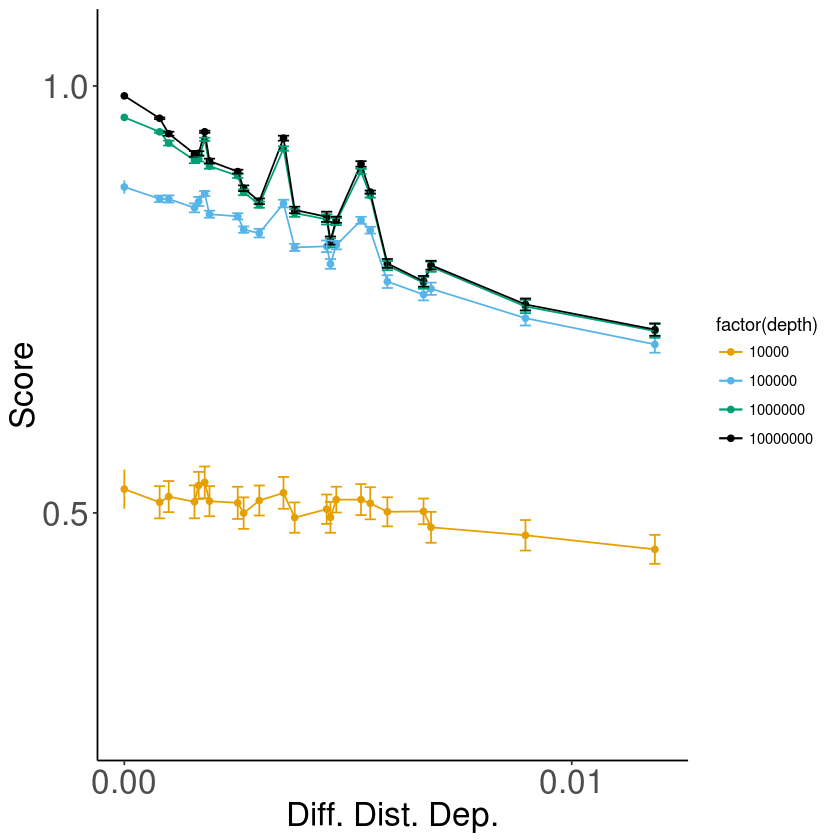

png 
  2

[1] "/ifs/scratch/oursu/paper_2017-12-20/simulations/DistanceDependence/HiC-Spector.results.txt"
[1] "10000 0.000493579483033195"
[1] "100000 1.30844897389935e-32"
[1] "1000000 4.2402764786732e-36"
[1] "10000000 5.79037400408277e-36"


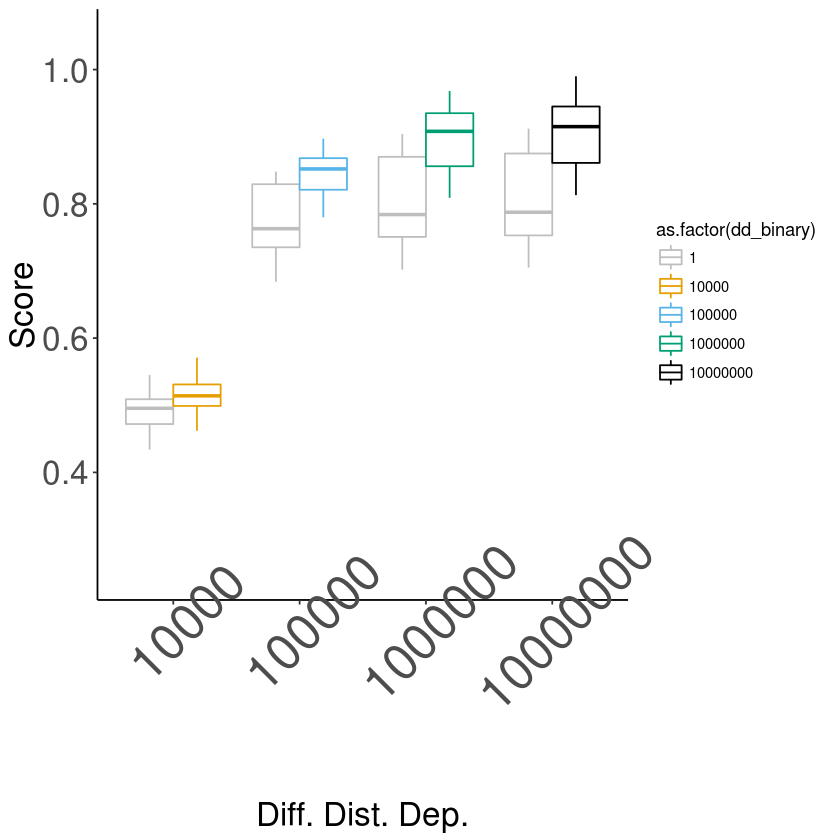

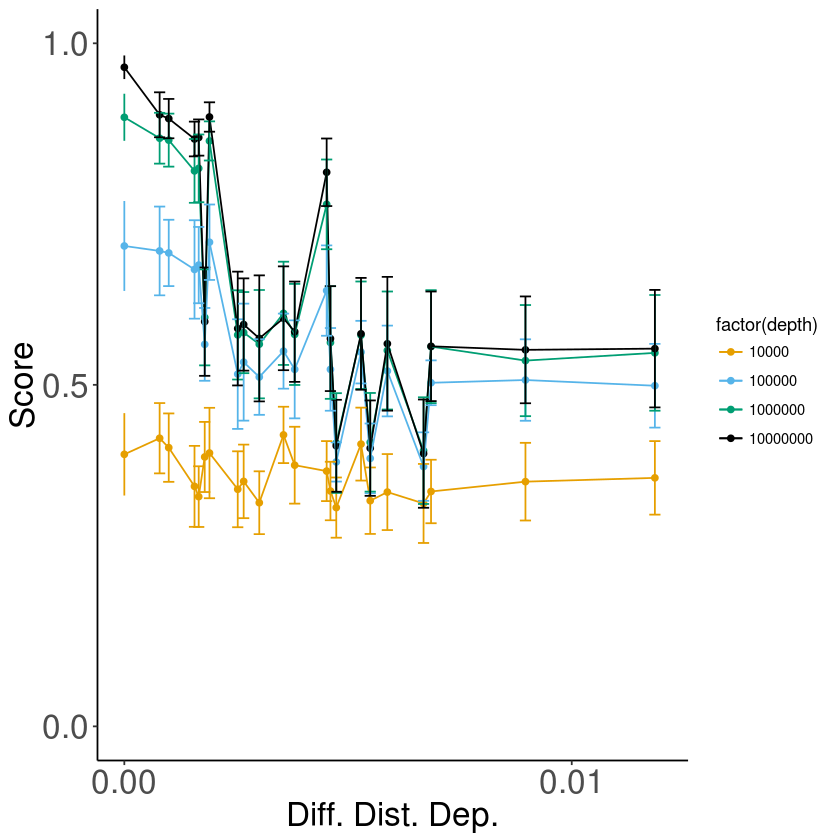

png 
  2

[1] "/ifs/scratch/oursu/paper_2017-12-20/simulations/DistanceDependence/HiCRep.results.txt"
[1] "10000 0.224015638829085"
[1] "100000 0.419156876007149"
[1] "1000000 0.96933822748675"
[1] "10000000 0.162902225593099"


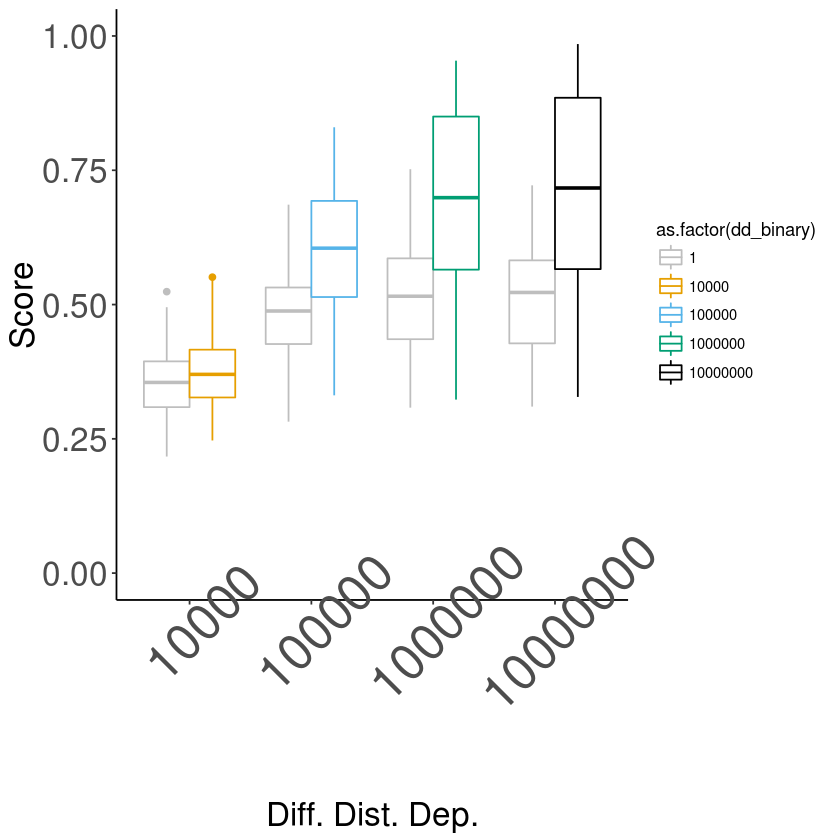

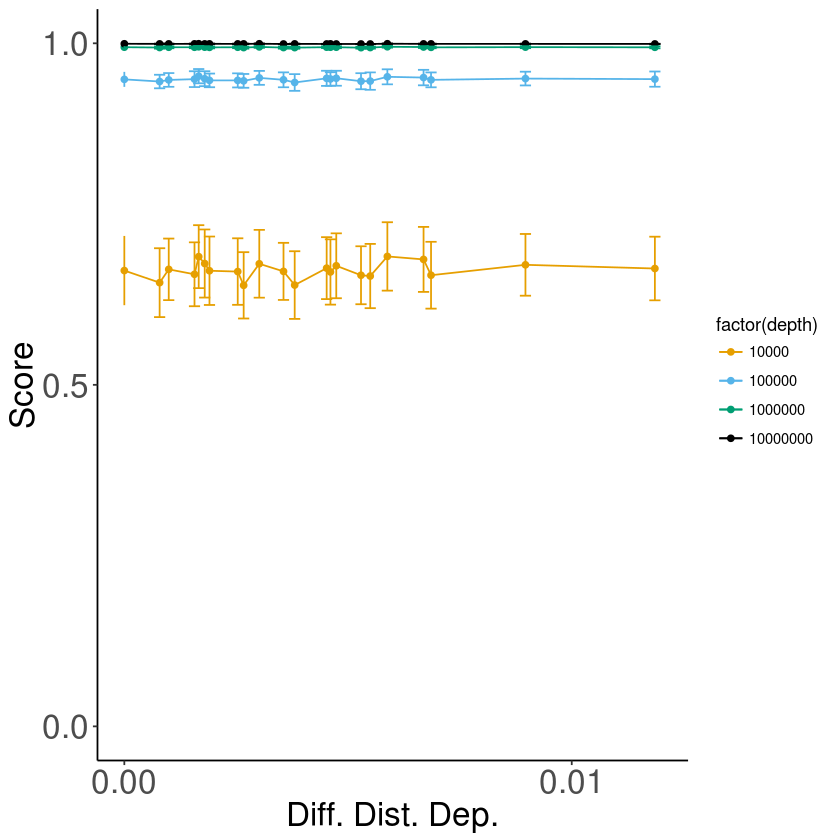

png 
  2

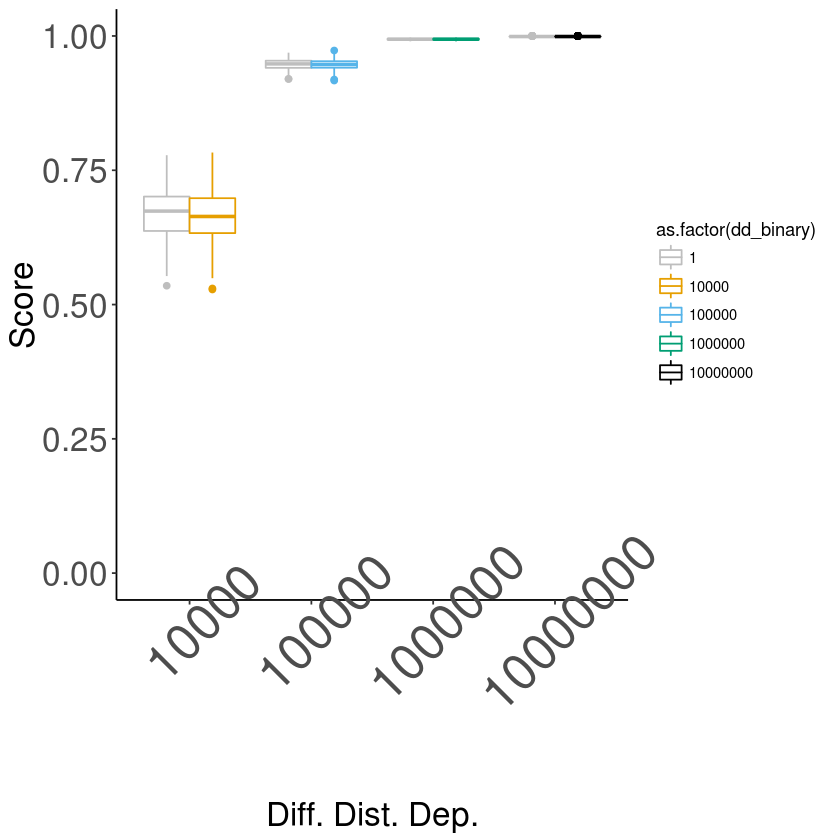

In [62]:
plot_dd=function(f,out,yname,xname,noisename,multi,mini,maxi,xmax,myxbreaks,WIDTH=9,HEIGHT=6){
    #======= settings for nice-looking ggplots
    niceggplot=theme(panel.border = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))+theme(axis.text=element_text(size=20),axis.title=element_text(size=20))+theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))

    niceggplot_fullborders=theme(axis.text=element_text(size=20),
                             axis.title=element_text(size=20))
    #==========================================

    ####### read distance dependence differences from the file
    dds=read.table('/ifs/scratch/oursu/paper_2017-12-20/simulations/dd/dddiff.txt')
    rownames(dds)=paste(as.character(dds[,1]),as.character(dds[,2]))

    scores=read.table(f)
    colnames(scores)=c('Depth1','Rep1','EN1','NN1','BN1','ab1','dd1','Depth2','Rep2','EN2','NN2','BN2','ab2','dd2','score')
    d=which(duplicated(scores))
    if (length(d)>=1){
    scores=scores[-which(duplicated(scores)),]
    }
    write.table(scores,file=gsub('.pdf','.txt',out),col.names=TRUE,row.names=FALSE,quote=FALSE,sep='\t')


    scores[which(as.character(scores[,'dd1'])=='0'),'dd1']='GM12878_combined'
    scores[which(as.character(scores[,'dd1'])=='1'),'dd1']='HMEC'
    scores[which(as.character(scores[,'dd1'])=='2'),'dd1']='HUVEC'
    scores[which(as.character(scores[,'dd1'])=='3'),'dd1']='IMR90'
    scores[which(as.character(scores[,'dd1'])=='4'),'dd1']='K562'
    scores[which(as.character(scores[,'dd1'])=='5'),'dd1']='KBM7'
    scores[which(as.character(scores[,'dd1'])=='6'),'dd1']='NHEK'  

    scores[which(as.character(scores[,'dd2'])=='0'),'dd2']='GM12878_combined'
    scores[which(as.character(scores[,'dd2'])=='1'),'dd2']='HMEC'
    scores[which(as.character(scores[,'dd2'])=='2'),'dd2']='HUVEC'
    scores[which(as.character(scores[,'dd2'])=='3'),'dd2']='IMR90'
    scores[which(as.character(scores[,'dd2'])=='4'),'dd2']='K562'
    scores[which(as.character(scores[,'dd2'])=='5'),'dd2']='KBM7'
    scores[which(as.character(scores[,'dd2'])=='6'),'dd2']='NHEK' 
    scores_dd=paste(as.character(scores[,'dd1']),as.character(scores[,'dd2']))
    scores=data.frame(scores,dddiff=dds[scores_dd,3],
                      dd_difference=(as.character(scores[,'dd1'])==as.character(scores[,'dd2'])))
    scores=scores[which(as.character(scores[,'Rep1'])==as.character(scores[,'Rep2'])),]

    same=which(as.character(scores[,'dd1'])==as.character(scores[,'dd2']))
    scores[,'dd_difference']=as.character(scores[,'dd_difference'])
    scores[,'dd_difference_x']=as.character(scores[,'dd_difference'])
    scores[same,'dd_difference_x']='same'
    scores[-same,'dd_difference_x']='different'
    scores[same,'dd_difference']=scores[same,'Depth1']
    scores[-same,'dd_difference']='different'
    scores[,"Depth1"]=factor(scores[,"Depth1"])
    scores=data.frame(scores,dd_binary=scores[,'dddiff'])
        dd_threshold=0.005
    scores[which(as.numeric(as.character(scores[,'dd_binary']))>=dd_threshold),'dd_binary']=1
    scores[which(as.numeric(as.character(scores[,'dd_binary']))<dd_threshold),'dd_binary']=0
    scores[which(as.numeric(as.character(scores[,'dd_binary']))==0),'dd_binary']=as.character(scores[which(as.numeric(as.character(scores[,'dd_binary']))==0),'Depth2'])

    print(f)
    depths=unique(scores[,'Depth1'])
    for (depth in depths){
        #print(depth)
        keep=scores[which(as.character(scores[,'Depth1'])==depth),]
        w=wilcox.test(keep[which(as.character(keep[,'dd_binary'])=="1"),'score'],keep[which(as.character(keep[,'dd_binary'])!="1"),'score'])
        print(paste(depth,w[['p.value']]))
    }


        #record means and +-1 standard deviation
        #for each depth and diff distance dep
        depths=unique(scores[,'Depth2'])
        dddiffs=unique(scores[,'dddiff'])
        datastats=data.frame(depth=rep(depths,times=length(dddiffs)),
                dddiff=rep(dddiffs,each=length(depths)),
                score_mean=0.0,score_l=0.0,score_h=0.0)
        for (i in c(1:(dim(datastats)[1]))){
            depth=datastats[i,'depth']
            dddiff=datastats[i,'dddiff']
            vals=as.numeric(as.character(scores[intersect(which(as.character(scores[,'Depth1'])==as.character(depth)),
                      which(as.character(scores[,'dddiff'])==as.character(dddiff))),'score']))
            m=mean(vals)
            s=sd(vals)
            datastats[i,'score_mean']=m
            datastats[i,'score_l']=m-s
            datastats[i,'score_h']=m+s
        }


        p=ggplot(datastats,aes(x=dddiff,y=score_mean,color=factor(depth)))+
          geom_point()+geom_line()+
          geom_errorbar(aes(ymin=score_l,ymax=score_h),width=0.05*multi)+
          theme_bw()+
          ylab(yname)+xlab(xname)+
          scale_colour_manual(values=c("10000"="#E69F00","100000"="#56B4E9","1000000"="#009E73","10000000"="#000000"))+
          scale_y_continuous(breaks = seq(from=-1,to=1,by=0.5), limits = c(mini,maxi))+
          scale_x_continuous(breaks = myxbreaks,limits=c(0,xmax))+
          #xlim(-1*0.05*multi,xmax)+
          niceggplot
        print(p)
    
        pdf(out,width=WIDTH,height=HEIGHT)
        print(p+
         theme(axis.title.y = element_text(size = rel(3), angle = 90))+
         theme(axis.title.x = element_text(size = rel(3), angle = 0))+
         theme(axis.text.x = element_text(size = rel(3), angle = 0))+
         theme(axis.text.y = element_text(size = rel(3), angle = 0)))
        dev.off()

        
        p=ggplot(scores,aes(x=Depth1,y=score,color=as.factor(dd_binary)))+
            theme_bw()+geom_boxplot()+#geom_point()+
            scale_colour_manual(values=c("10000"="#E69F00","100000"="#56B4E9","1000000"="#009E73","10000000"="#000000","1"="gray"))+
            xlab(xname)+ylab(yname)+
            theme(axis.text.x = element_text(size = rel(1.5), angle = 45))+
            ylim(mini,maxi)+
            theme(axis.text = element_text(size = rel(1), angle = 0))+scale_alpha_manual(guide='none', values = list(biorep =1, nonrep = 1))+
            niceggplot
        print(p)
    
        pdf(paste(out,'.discretized.pdf',sep=''),width=WIDTH,height=HEIGHT)
        print(p+
             theme(axis.title.y = element_text(size = rel(2), angle = 90))+
            theme(axis.title.x = element_text(size = rel(2), angle = 0))+
            theme(axis.text.x = element_text(size = rel(1.5), angle = 45))+
            theme(axis.text.y = element_text(size = rel(1.5), angle = 0)))
        dev.off()

}

MULTI_DD=0.005
XBREAKS=c(0,0.01,0.02)
plot_dd(paste(SIMULATIONS_PATH,'/DistanceDependence/GenomeDISCO.results.txt',sep=''),
paste(SIMULATIONS_PATH,'/DistanceDependence/GenomeDISCO.dd.results.pdf',sep=''),'Score','Diff. Dist. Dep.','NA',MULTI_DD,0.25,1.05,0.012,XBREAKS)

plot_dd(paste(SIMULATIONS_PATH,'/DistanceDependence/HiC-Spector.results.txt',sep=''),
paste(SIMULATIONS_PATH,'/DistanceDependence/HiC-Spector.dd.results.pdf',sep=''),'Score','Diff. Dist. Dep.','NA',MULTI_DD,0,1,0.012,XBREAKS)

plot_dd(paste(SIMULATIONS_PATH,'/DistanceDependence/HiCRep.results.txt',sep=''),
paste(SIMULATIONS_PATH,'/DistanceDependence/HiCRep.dd.results.pdf',sep=''),'Score','Diff. Dist. Dep.','NA',MULTI_DD,0,1,0.012,XBREAKS)
